<h1>Projeto de Aprendizado de Máquina</h1>

### 2º semestre de 2022

#### Grupo formado por:
        Ana Clara Loponi - 220073
        Ana Clara Brandão - 220069
        Heitor Bernardes - 220052
        Lorraine Casseano - 220036
        
<h2>Dengue: O uso de ferramentas estatísticas para a propensão de uma das doenças mais negligenciadas do Brasil.</h2>
<h3>Usando Machine Learning para uma previsão de casos de Dengue em Campinas/SP</h3>

<ht> Entende-se que a Dengue é uma das doenças mais negligenciadas do Brasil, visto que, em todos os anos se observa um pico no número de casos confirmados. Observe que o padrão dos picos é referenciado com as características climáticas de épocas do ano. Com base nisso, é uma ideia de desenvolver um plano preventivo baseado nos dados testados.</ht>

<h2> Análise Exploratória dos Dados </h2>

In [1]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados1 = pd.read_excel("dataset_dengue.xlsx") # Lendos os dados.

dados1.dtypes # Este comando informa quais os tipos de dados o dataframe contém.

data                    datetime64[ns]
casos-confirmados                int64
chuva                          float64
temperatura-media              float64
temperatura-mininima           float64
temperatura-maxima             float64
dtype: object

#### Visualização das linhas do dataset

In [3]:
dados1.head(11)

,data,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
0,1998-01-01,237,179.2,25.7,20.2,28.1
1,1998-02-01,331,226.3,25.1,20.0,28.0
2,1998-03-01,562,149.1,24.8,22.4,27.2
3,1998-04-01,187,46.4,22.7,18.1,26.0
4,1998-05-01,32,88.3,19.2,15.7,22.9
5,1998-06-01,11,21.2,18.0,15.4,21.2
6,1998-07-01,6,7.9,19.0,13.5,22.9
7,1998-08-01,4,15.6,21.7,17.0,25.7
8,1998-09-01,7,88.1,21.9,18.9,26.1
9,1998-10-01,7,167.3,21.9,18.4,24.6


<ht>Identificamos o número de linhas do nosso dataset como índices, pois entendemos a quantidade de meses durante os anos de 1998 à 2014 como uma feature. Assim, ao invés de agruparmos por data, agrupamos por meses a partir de Janeiro/1998, facilitando a resolução do problemas.</ht>

In [4]:
print(dados1.index)

dados2 = dados1.drop(columns = ['data'], axis = 1) # Exclui a coluna 'data'

meses = [] # Insere uma coluna 'meses' para usar como refencia de data
for i in dados1.index:
    meses.append(i)
    
dados1.insert(6, "meses", meses, True)
dados2.insert(5, "meses", meses, True)
dados3 = dados2.copy()

RangeIndex(start=0, stop=204, step=1)


### Testando Normalizações

In [5]:
#padrão 

dados_teste = pd.DataFrame()

media_chuva = dados1['chuva'].mean()
desvio_padrao_chuva = dados1['chuva'].std()

dados_teste['chuva_zscore'] = (dados1['chuva'] - media_chuva) / desvio_padrao_chuva

#print(dados_teste['chuva_zscore'] )

In [6]:
#maximo_absoluto

maximo_absoluto = dados1['chuva'].max()

dados_teste['chuva_max_abs'] = dados1['chuva'] / maximo_absoluto

#print(dados_teste['chuva_max_abs'])

### Normaliação por Máximo e Mínimo Absoluto

In [7]:
dados2 = pd.DataFrame() # Novo dataframe para armazenar os dados

#chuva

maximo_chuva = dados1['chuva'].max()
minimo_chuva = dados1['chuva'].min()

dados2['chuva_min_max_abs'] = (dados1['chuva'] - minimo_chuva) / (maximo_chuva - minimo_chuva)

#print(dados2['chuva_min_max_abs'])

In [8]:
#temperatura

maximo_temp_med = dados1['temperatura-media'].max()
minimo_temp_med = dados1['temperatura-media'].min()

dados2['temp-med_min_max_abs'] = (dados1['temperatura-media'] - minimo_temp_med) / (maximo_temp_med - minimo_temp_med)

#print(dados2['temp-med_min_max_abs'])

In [9]:
#temperatura_mínima

maximo_temp_min = dados1['temperatura-mininima'].max()
minimo_temp_min = dados1['temperatura-mininima'].min()

dados2['temp-min_min_max_abs'] = (dados1['temperatura-mininima'] - minimo_temp_min) / (maximo_temp_min - minimo_temp_min)

#print(dados2['temp-min_min_max_abs'])

In [10]:
#tempertura_máxima

maximo_temp_max = dados1['temperatura-maxima'].max()
minimo_temp_max = dados1['temperatura-maxima'].min()

dados2['temp-max_min_max_abs'] = (dados1['temperatura-maxima'] - minimo_temp_max) / (maximo_temp_max - minimo_temp_max)

#print(dados2['temp-max_min_max_abs'])

In [11]:
#casos_confirmados

maximo_casos = dados1['casos-confirmados'].max()
minimo_casos = dados1['casos-confirmados'].min()

dados2['casos_min_max_abs'] = (dados1['casos-confirmados'] - minimo_casos) / (maximo_casos - minimo_casos)

#print(dados2['casos_min_max_abs'])

### Análise Exploratória dos Dados
#### Média e Desvio Padrão

In [12]:
#Média de cada coluna de dados

M1 = dados1["casos-confirmados"].mean()

M2 = dados1["chuva"].mean()

M3 = dados1["temperatura-mininima"].mean()

M4 = dados1["temperatura-maxima"].mean()

print(f' Médias: {M1, M2, M3, M4}')

#Desvio Padrão

D1 = dados1["casos-confirmados"].std()

D2 = dados1["chuva"].std()

D3 = dados1["temperatura-mininima"].std()

D4 = dados1["temperatura-maxima"].std()

print(f' Desvios Padrão: {D1, D2, D3, D4}')

 Médias: (357.53921568627453, 112.07549019607842, 17.679411764705883, 25.565196078431374)
 Desvios Padrão: (1741.8147587005246, 97.3904390734082, 3.336315723659817, 2.2498635888116434)


Observando esses resultados, concluimos que eles não eram satisfatórios, e não forneciam as informações que precisavamos. Por isso, optamos por uma análise diferente, fazendo uma separação referente aos meses, de forma que as médias sejam separadas em média_janeiro, média_fevereiro, média_março e assim por diante.

In [13]:
# Separando os dados e colocando-os em listas iteraveis

conv = dados3.values.tolist() # função que transforma de dataset para lista

casos = []
chuva = []
tem_med = []
tem_max = []
tem_min = []

for i in conv:
    for j in range(0, len(i), 6):
        casos.append(i[j])

for i in conv:
    for j in range(1, len(i), 6):
        chuva.append(i[j])
        
for i in conv:
    for j in range(2, len(i), 6):
        tem_med.append(i[j])
        
for i in conv:
    for j in range(3, len(i), 6):
        tem_min.append(i[j])
        
for i in conv:
    for j in range(4, len(i), 6):
        tem_max.append(i[j])
        

#print(casos)
#print(chuva)
#print(tem_med)
#print(tem_min) 
#print(tem_max)

In [14]:
def separacao(x, c):
    
    """ Separa os dados por mês e calcula a média e desvio padrão """
    
    if c >= 12: # Critério de parada
        return 0 
    
    else:

        lista = []  # Para armazernar e processar os dados 
        lista2 = []
    
        for i in range(c,len(x),12): # Separa os dados por meses, fazendo uma listagem dos dados com um intervalo de 12 itens
            lista.append(x[i])
    
    m = np.mean(lista) # função do numpy para calculo de media 
    dp = np.std(lista) # função do numpy para calculo de desvio padrão
    lista2.append(m)
    lista2.append(dp)
    
        
    lista.clear() # Ao final da operação, a lista é esvaziada para não ter problemas
    
    print(lista2)
    
    return separacao(x, c + 1)  # Usei recursão para seguir calculando para os demais meses  

In [15]:
#Descomente esta célula para ver os resultados
contagem = 0 
#separacao(casos, contagem)
#separacao(chuva, contagem)
#separacao(tem_med, contagem)
#separacao(tem_min, contagem)
#separacao(tem_max, contagem)

#### Matriz de Correlação

<AxesSubplot:>

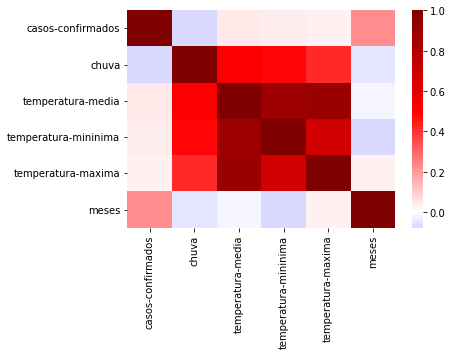

In [16]:
# Conexão entre dois fatores para compreender as informações e dependências entre as features.
# Os coeficientes de correlação são padronizados. A correlação mede tanto a força como a direção da relação linear entre duas variáveis

dados_corr = dados3.corr()
dados_corr
sns.heatmap(dados_corr, cmap='seismic', center=0)

#### Relação Número de casos - Tempo

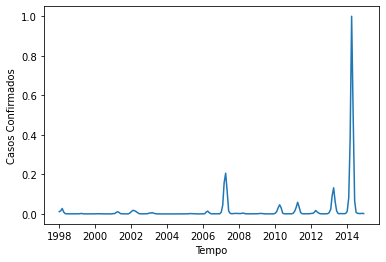

In [17]:
#dados1["casos-confirmados"] = np.log10(dados1["casos-confirmados"])

plt.plot(dados1['data'], dados2['casos_min_max_abs'])
plt.xlabel('Tempo')
plt.ylabel('Casos Confirmados')
plt.show()

array([[<AxesSubplot:title={'center':'casos-confirmados'}>]], dtype=object)

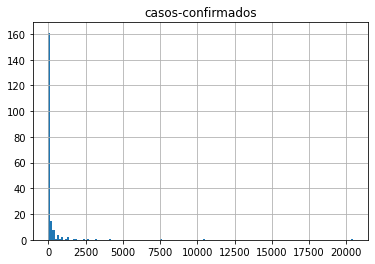

In [18]:
TARGET = ["casos-confirmados"]
dados1[TARGET].hist(bins=150)

O histograma mostra uma relação de número de ocorrencia (eixo y), referente aos 'casos-confirmados'(eixo x). O que observamos é que há pouca distribuição, sendo a grande maioria das ocorrencias valores abaixo de 1000, e pouquissimas ocorrencia com valores mais elevados, bem como é mostrado no plot superior. 

### Classificação e Categorização 

In [19]:
# Separa o número de casos

logic = dados3["casos-confirmados"] <= 20
print(len(dados3.loc[logic]),'Casos raros/isolados')
logic = (dados3["casos-confirmados"] > 20) & (dados3["casos-confirmados"] <= 50)
print(len(dados3.loc[logic]),'Pouquissimos casos')
logic = (dados3["casos-confirmados"] > 50) & (dados3["casos-confirmados"] <= 250)
print(len(dados3.loc[logic]),'Poucos casos')
logic = (dados3["casos-confirmados"] > 250) & (dados3["casos-confirmados"] <= 1000)
print(len(dados3.loc[logic]),'Numero medio de casos')
logic = (dados3["casos-confirmados"] > 1000) & (dados3["casos-confirmados"] <= 2500)
print(len(dados3.loc[logic]),'Muitos casos')
logic = (dados3["casos-confirmados"] > 2500)
print(len(dados3.loc[logic]),'Surtos de dengue')

104 Casos raros/isolados
37 Pouquissimos casos
33 Poucos casos
18 Numero medio de casos
6 Muitos casos
6 Surtos de dengue


In [20]:
# Adiciona uma coluna com a categorização ao dataset

dados3['casos-categórico'] = None

logic = dados1["casos-confirmados"] <= 20
dados3.loc[logic, 'casos-categórico'] ='Casos raros/isolados'
logic = (dados1["casos-confirmados"] > 20) & (dados3["casos-confirmados"] <= 50)
dados3.loc[logic, 'casos-categórico'] = 'Pouquissimos casos'
logic = (dados1["casos-confirmados"] > 50) & (dados3["casos-confirmados"] <= 250)
dados3.loc[logic, 'casos-categórico'] = 'Poucos casos'
logic = (dados1["casos-confirmados"] > 250) & (dados3["casos-confirmados"] <= 1000)
dados3.loc[logic, 'casos-categórico'] = 'Numero medio de casos'
logic = (dados1["casos-confirmados"] > 1000)  & (dados3["casos-confirmados"] <= 2500)
dados3.loc[logic, 'casos-categórico'] = 'Muitos casos'
logic = (dados1["casos-confirmados"] > 2500)  
dados3.loc[logic, 'casos-categórico'] = 'Surtos de dengue'

In [21]:
# Converte dados categoricos em numéricos 

conversao = {
    "Casos raros/isolados": 1,
    "Pouquissimos casos": 2,
    "Poucos casos": 3,
    "Numero medio de casos": 4,
    "Muitos casos": 5,
    "Surtos de dengue": 6,
}

dados3["cc"] = dados3["casos-categórico"].map(conversao)

dados_categoricos = dados3.copy()
dados_categoricos.to_excel("dataset_dengue_categorico.xlsx") # transforma o novo dataset em um arquivo excel
dados_categoricos 

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima,meses,casos-categórico,cc
0,237,179.2,25.7,20.2,28.1,0,Poucos casos,3
1,331,226.3,25.1,20.0,28.0,1,Numero medio de casos,4
2,562,149.1,24.8,22.4,27.2,2,Numero medio de casos,4
3,187,46.4,22.7,18.1,26.0,3,Poucos casos,3
4,32,88.3,19.2,15.7,22.9,4,Pouquissimos casos,2
...,...,...,...,...,...,...,...,...
199,55,12.2,20.6,13.1,24.7,199,Poucos casos,3
200,40,69.2,23.0,18.6,26.8,200,Pouquissimos casos,2
201,40,15.6,24.7,17.2,30.0,201,Pouquissimos casos,2
202,57,154.8,25.0,22.1,28.3,202,Poucos casos,3
